EDA on video games sales

Loading the dependencies

In [130]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Loading the data into pandas dataframe

In [3]:
df=pd.read_csv('vgsales.csv')

Observing the first five and last five rows of the dataset

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Observing the data types of each column

In [7]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Finding out the total number of rows and columns in the data

In [8]:
df.shape

(16598, 11)

Finding out the column names

In [9]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


Checking for null values if any

In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

There are a total of 271 null values in Year column and 58null values in Publisher column

Using the mean replacement strategy to replace the null values in year column and using mode replacement strategy to replace the null values in the publisher column

In [13]:
year_mean=int(df['Year'].mean())
publisher_mode=df['Publisher'].mode()[0]

print(f"year__mean:{year_mean} and publisher_mode:{publisher_mode}")

year__mean:2006 and publisher_mode:Electronic Arts


In [14]:
df['Year']=df['Year'].fillna(year_mean)
df['Publisher']=df['Publisher'].fillna(publisher_mode)

Now,Again checking the null values count to ensure that no null values are present in any of the columns

In [15]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Observing the statistical summary of the data and obtaining valuable information from the dataset

In [17]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16598,16598,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1409,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.399807,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.781426,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Looking out for most genre based games played in total

In [19]:
df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

Action and Sports genre games are the most demanded genre based games

Visualizing these information using countplot

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\1676755574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre',data=df,order=df['Genre'].value_counts().index,palette=palette)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

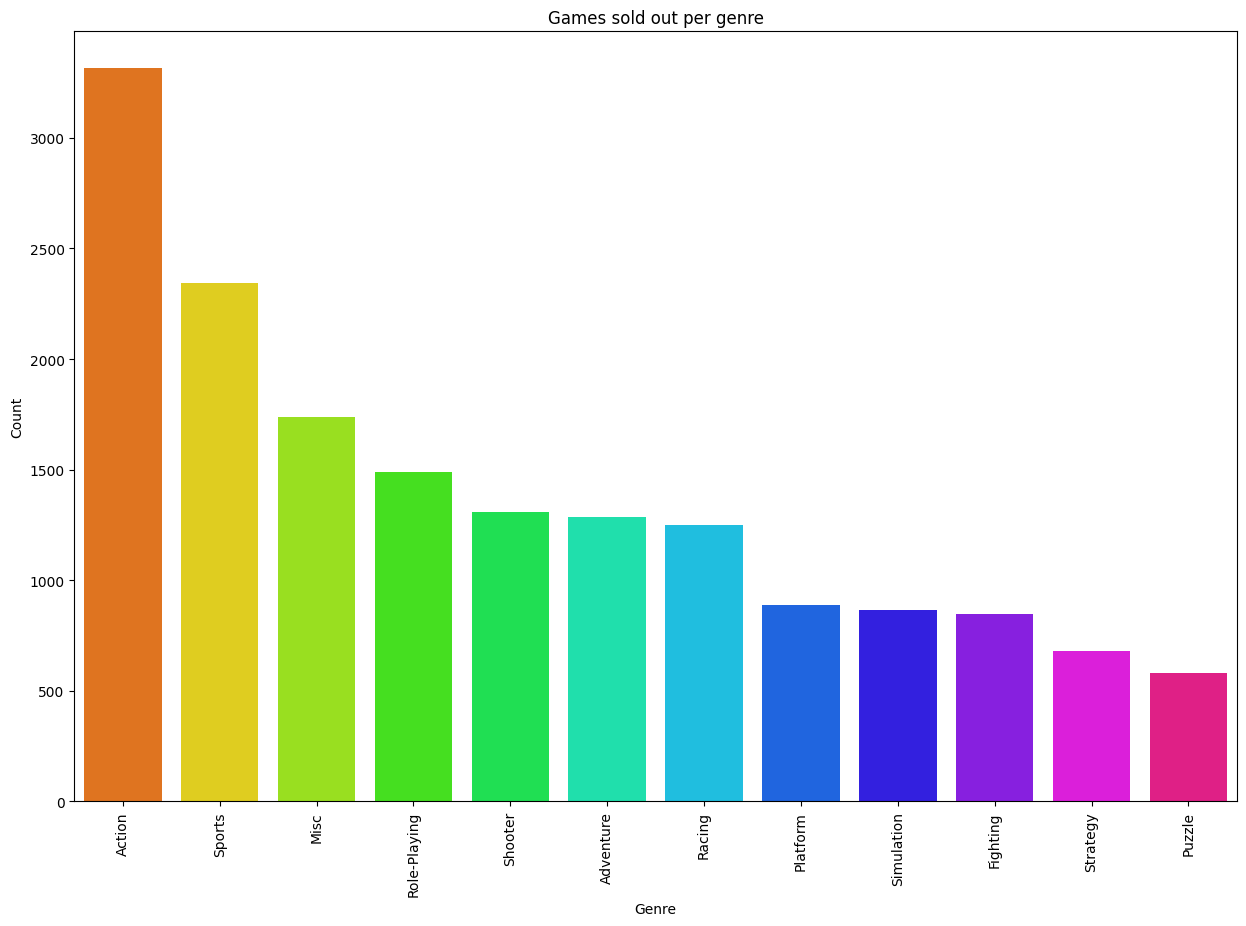

In [31]:
plt.figure(figsize=(15,10))
palette=sns.color_palette("hsv",len(df['Genre'].unique()))
sns.countplot(x='Genre',data=df,order=df['Genre'].value_counts().index,palette=palette)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title("Games sold out per genre")
plt.xticks(rotation=90)

Year with the most game realeses

In [30]:
df['Year']=df['Year'].astype(int)
df['Year'].value_counts()

Year
2009    1431
2008    1428
2006    1279
2010    1259
2007    1202
2011    1139
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: int64

Visualizing these information using countplot

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\3944908928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Year'],data=df,order=df['Year'].value_counts().head(10).index,palette=color_pal)
C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\3944908928.py:3: UserWarning: The palette list has more values (39) than needed (10), which may not be intended.
  sns.countplot(x=df['Year'],data=df,order=df['Year'].value_counts().head(10).index,palette=color_pal)


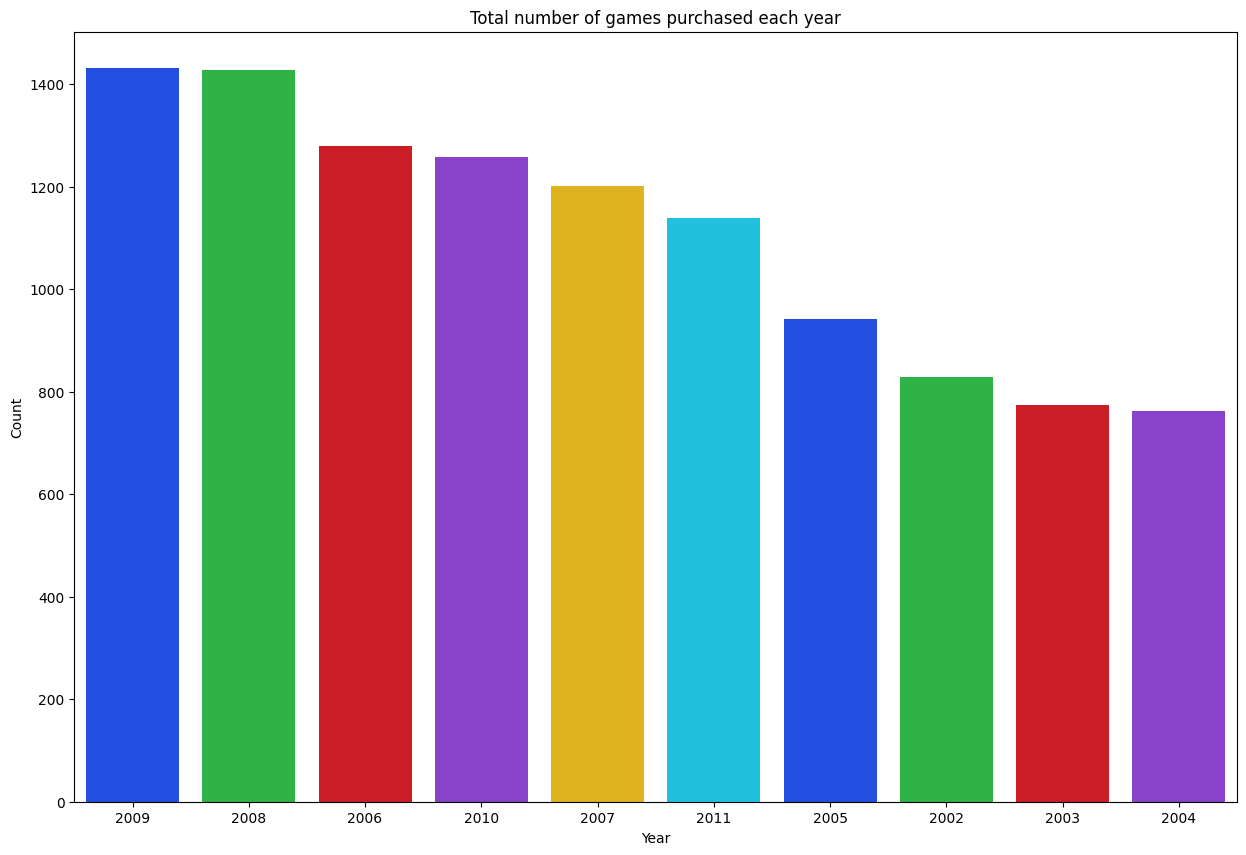

In [40]:
plt.figure(figsize=(15,10))
color_pal=sns.color_palette("bright6",len(df['Year'].unique()))
sns.countplot(x=df['Year'],data=df,order=df['Year'].value_counts().head(10).index,palette=color_pal)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Total number of games purchased each year")
plt.show()

Top year games released per genre

([0, 1, 2, 3, 4],
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2006'),
  Text(3, 0, '2010'),
  Text(4, 0, '2007')])

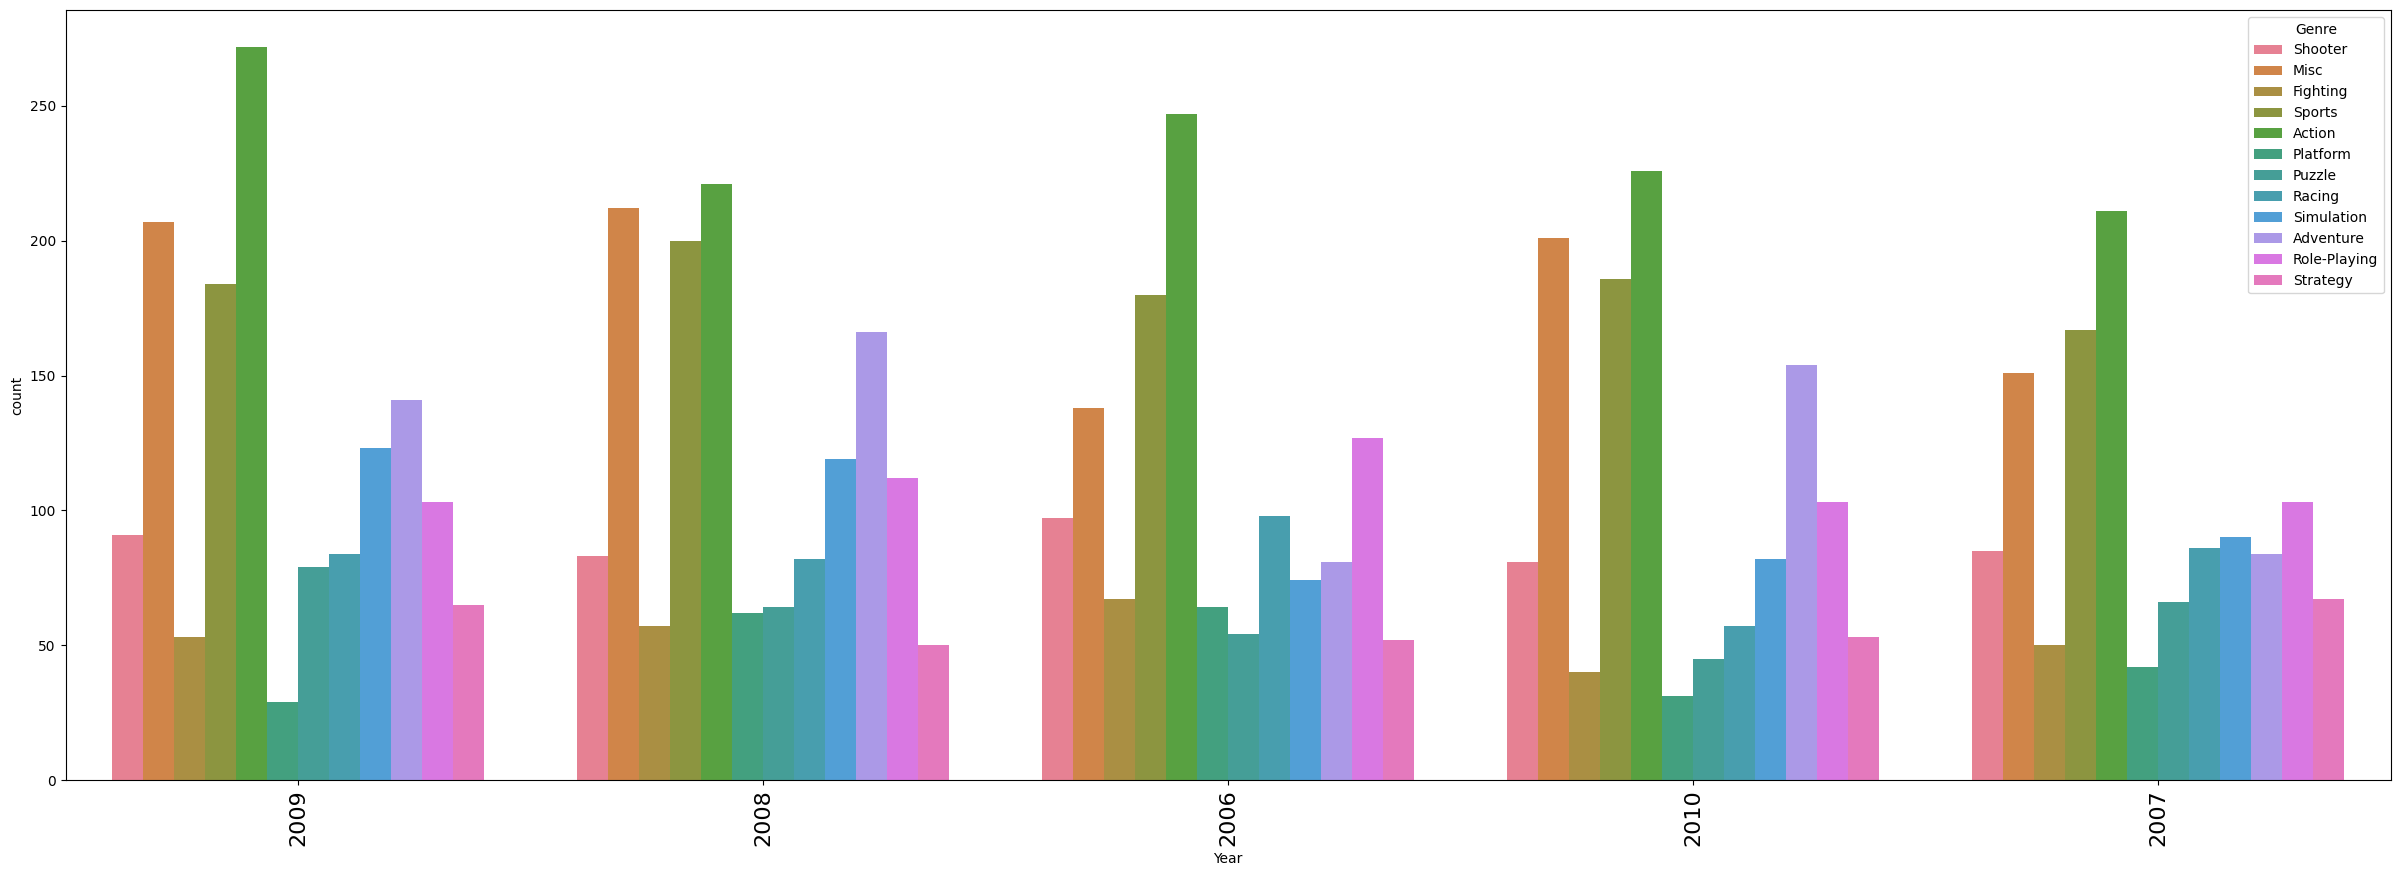

In [42]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

Years with the highest sales worldwide

In [57]:
year_highest_sales_world_wide=df.groupby(by=['Year'])['Global_Sales'].sum()
year_highest_sales_world_wide=year_highest_sales_world_wide.reset_index()
year_highest_sales_world_wide=year_highest_sales_world_wide.sort_values(by=['Global_Sales'],ascending=False).head(10)
print(year_highest_sales_world_wide)

    Year  Global_Sales
28  2008        678.90
29  2009        667.30
26  2006        621.12
27  2007        611.13
30  2010        600.45
31  2011        515.99
25  2005        459.94
24  2004        419.31
22  2002        395.52
33  2013        368.11


C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\183385118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Global_Sales', data=year_highest_sales_world_wide, palette=palette)


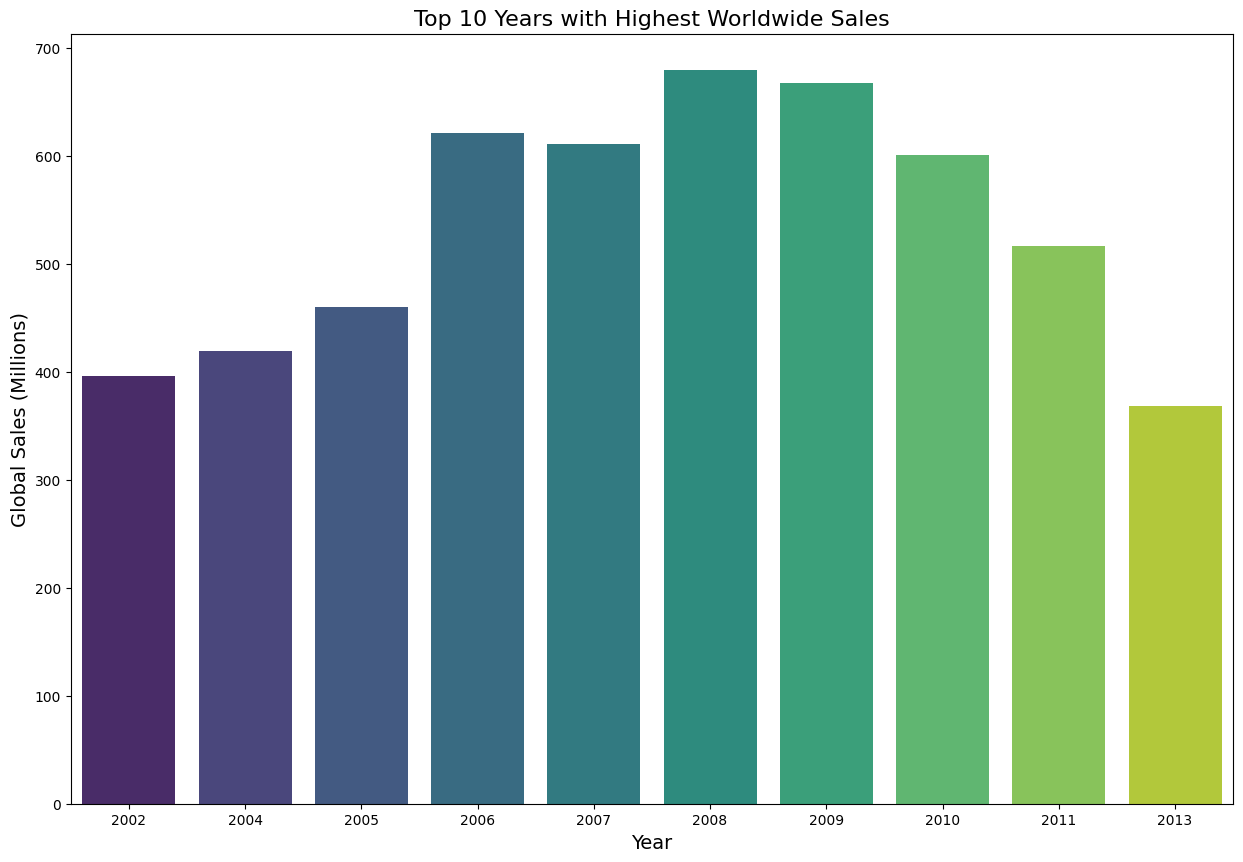

In [58]:
plt.figure(figsize=(15, 10))
palette = sns.color_palette("viridis", len(year_highest_sales_world_wide))
sns.barplot(x='Year', y='Global_Sales', data=year_highest_sales_world_wide, palette=palette)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales (Millions)', fontsize=14)
plt.title('Top 10 Years with Highest Worldwide Sales', fontsize=16)
plt.show()

Lets breakdown the sales for four different regions:North america,Japan,European union and others

In [59]:
year_sales_north_america=df.groupby(by=['Year'])['NA_Sales'].sum()
year_sales_north_america=year_sales_north_america.reset_index()
year_sales_north_america=year_sales_north_america.sort_values(by='NA_Sales',ascending=False).head(10)
print(year_sales_north_america)

    Year  NA_Sales
28  2008    351.44
29  2009    338.85
26  2006    322.64
27  2007    312.05
30  2010    304.24
25  2005    242.61
31  2011    241.06
24  2004    222.59
22  2002    216.19
23  2003    193.59


C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\281058363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='NA_Sales',data=year_sales_north_america,palette=palette)


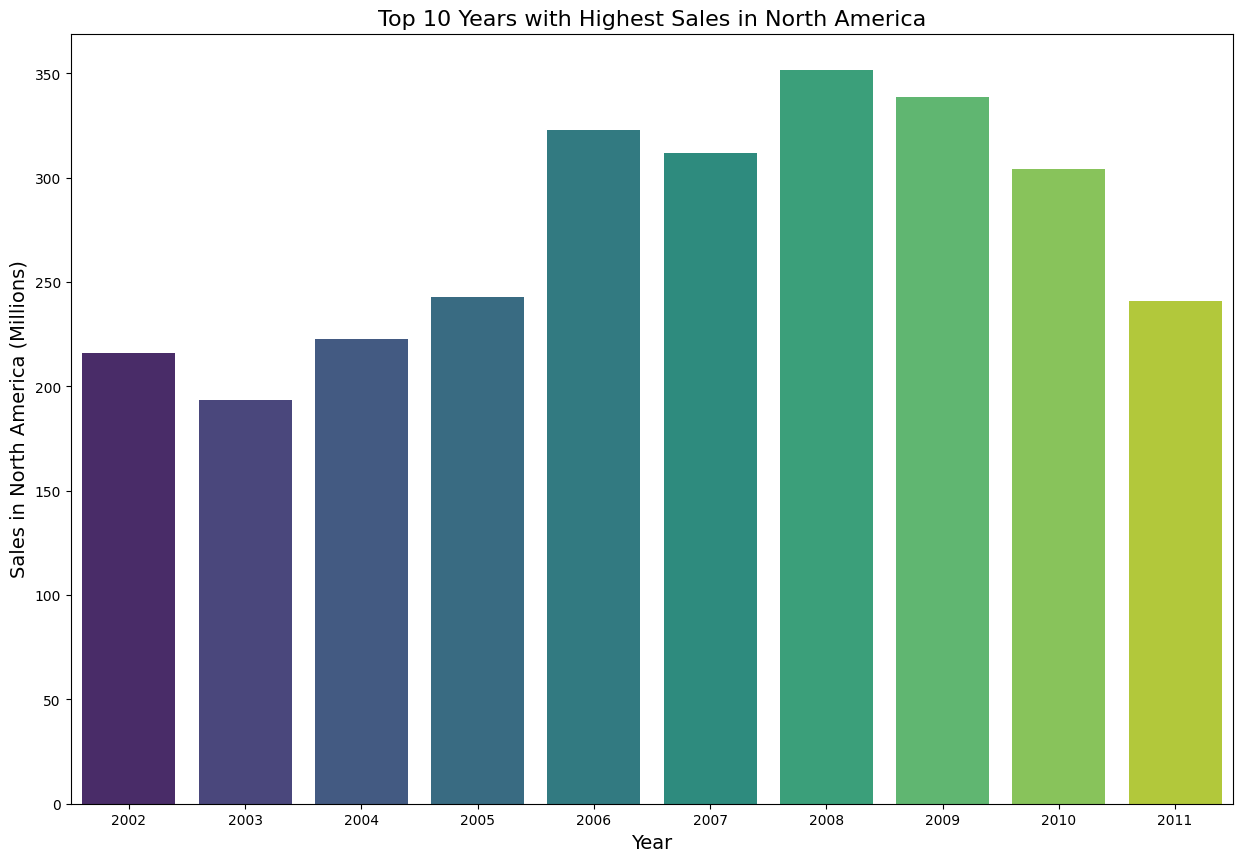

In [62]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='NA_Sales',data=year_sales_north_america,palette=palette)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in North America (Millions)', fontsize=14)
plt.title('Top 10 Years with Highest Sales in North America', fontsize=16)
plt.show()

In [63]:
year_sales_japan=df.groupby(by=['Year'])['JP_Sales'].sum()
year_sales_japan=year_sales_japan.reset_index()
year_sales_japan=year_sales_japan.sort_values(by='JP_Sales',ascending=False).head(10)
print(year_sales_japan)

    Year  JP_Sales
26  2006     80.45
29  2009     61.89
27  2007     60.29
28  2008     60.26
30  2010     59.49
16  1996     57.44
25  2005     54.28
31  2011     53.04
19  1999     52.34
32  2012     51.74


C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\4244529282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='JP_Sales',data=year_sales_japan,palette=palette)


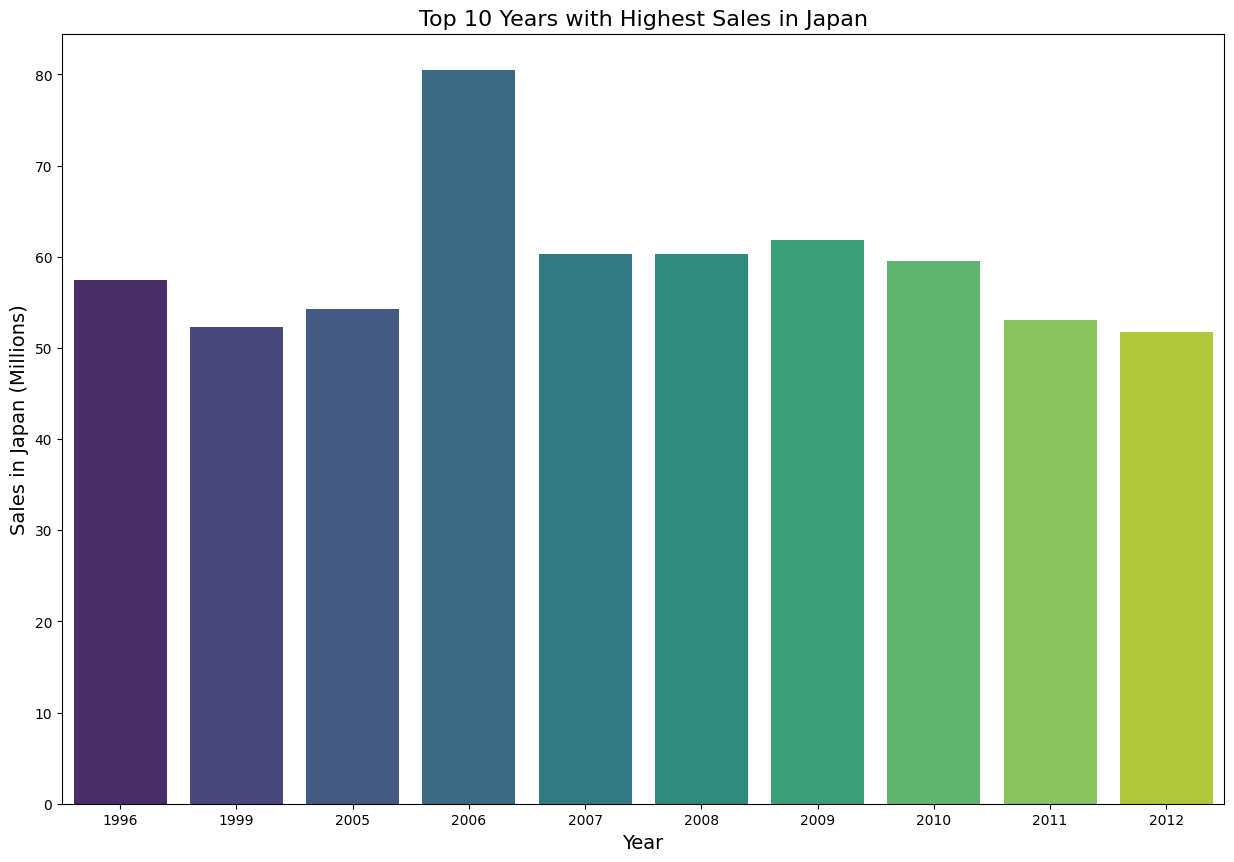

In [64]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='JP_Sales',data=year_sales_japan,palette=palette)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in Japan (Millions)', fontsize=14)
plt.title('Top 10 Years with Highest Sales in Japan', fontsize=16)
plt.show()

In [65]:
year_sales_EU=df.groupby(by=['Year'])['EU_Sales'].sum()
year_sales_EU=year_sales_EU.reset_index()
year_sales_EU=year_sales_EU.sort_values(by='EU_Sales',ascending=False).head(10)
print(year_sales_EU)

    Year  EU_Sales
29  2009    191.59
28  2008    184.40
30  2010    176.73
31  2011    167.44
27  2007    160.50
26  2006    154.25
33  2013    125.80
34  2014    125.65
25  2005    121.94
32  2012    118.78


C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\373597927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='EU_Sales',palette=palette,data=year_sales_EU)


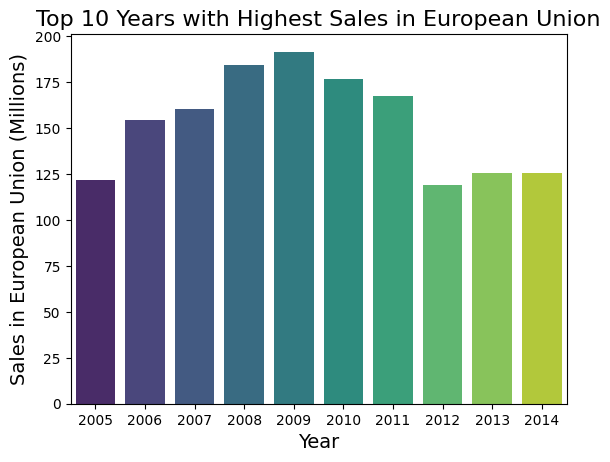

In [67]:
plt.Figure(figsize=(15,10))
sns.barplot(x='Year',y='EU_Sales',palette=palette,data=year_sales_EU)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in European Union (Millions)', fontsize=14)
plt.title('Top 10 Years with Highest Sales in European Union', fontsize=16)
plt.show()


In [69]:
year_sales_in_other=df.groupby(by=['Year'])['Other_Sales'].sum()
year_sales_in_other=year_sales_in_other.reset_index()
year_sales_in_other=year_sales_in_other.sort_values(by='Other_Sales',ascending=False).head(10)
print(year_sales_in_other)

    Year  Other_Sales
28  2008        82.39
27  2007        77.60
29  2009        74.77
26  2006        63.17
30  2010        59.90
31  2011        54.39
24  2004        47.29
25  2005        40.58
34  2014        40.02
33  2013        39.82


C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\2196529388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='Other_Sales',palette=palette,data=year_sales_in_other)


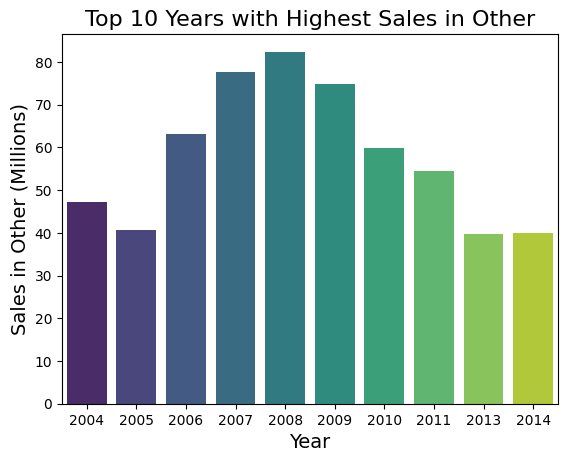

In [70]:
plt.Figure(figsize=(15,10))
sns.barplot(x='Year',y='Other_Sales',palette=palette,data=year_sales_in_other)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in Other (Millions)', fontsize=14)
plt.title('Top 10 Years with Highest Sales in Other', fontsize=16)
plt.show()


Now,Finding out the compostion of sales from different places in the top 5 years with highest sales

In [71]:
top_5_selling_years=year_highest_sales_world_wide.head()
print(top_5_selling_years)

    Year  Global_Sales
28  2008        678.90
29  2009        667.30
26  2006        621.12
27  2007        611.13
30  2010        600.45


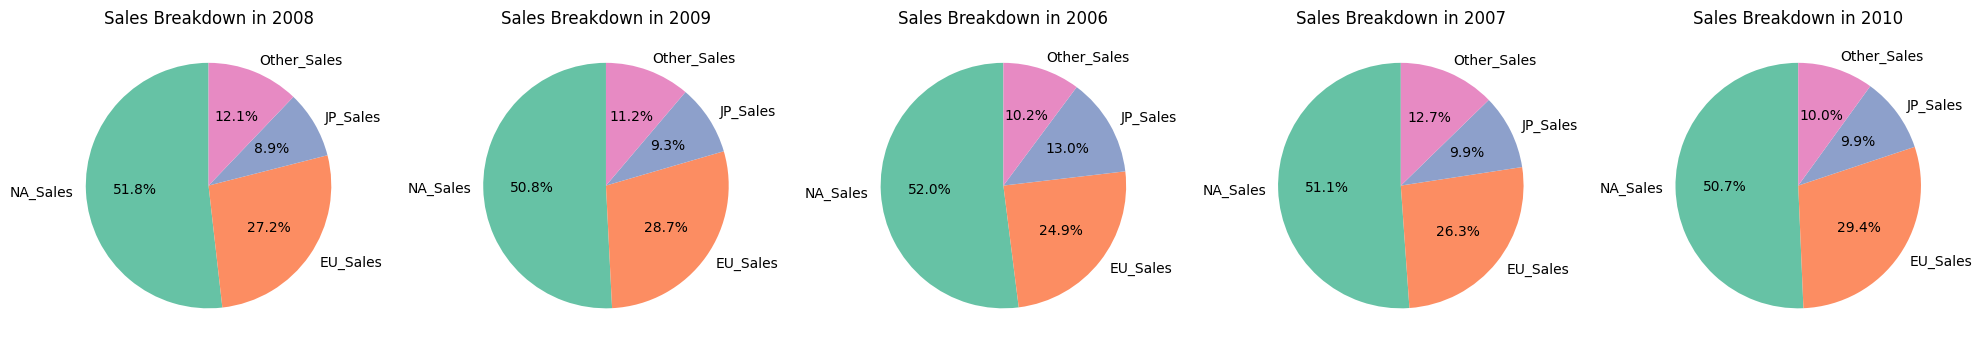

In [75]:
top_5_years = top_5_selling_years['Year']

fig, axes = plt.subplots(1, 5, figsize=(20, 10))  
axes = axes.flatten()

for i, year in enumerate(top_5_years):
    year_data = df[df['Year'] == year][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
    
    # Pie chart
    axes[i].pie(year_data, labels=year_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
    axes[i].set_title(f"Sales Breakdown in {year}")
    
plt.tight_layout()
plt.show()


Half of the sales in the video games are mainly generated from the North America region itself

Let's see the total number of games released in these years

In [86]:
top_5_years = top_5_selling_years['Year']
for year in top_5_years:
    num_games = df[df['Year'] == year].shape[0]
    print(f"Number of games released in {year}: {num_games}")
    genre_counts = df[df['Year'] == year]['Genre'].value_counts()
    publisher_counts=df[df['Publisher']==year]['Publisher'].value_counts()

Number of games released in 2008: 1428
Number of games released in 2009: 1431
Number of games released in 2006: 1279
Number of games released in 2007: 1202
Number of games released in 2010: 1259


Lets breakdown the games via genre released in these top selling years 

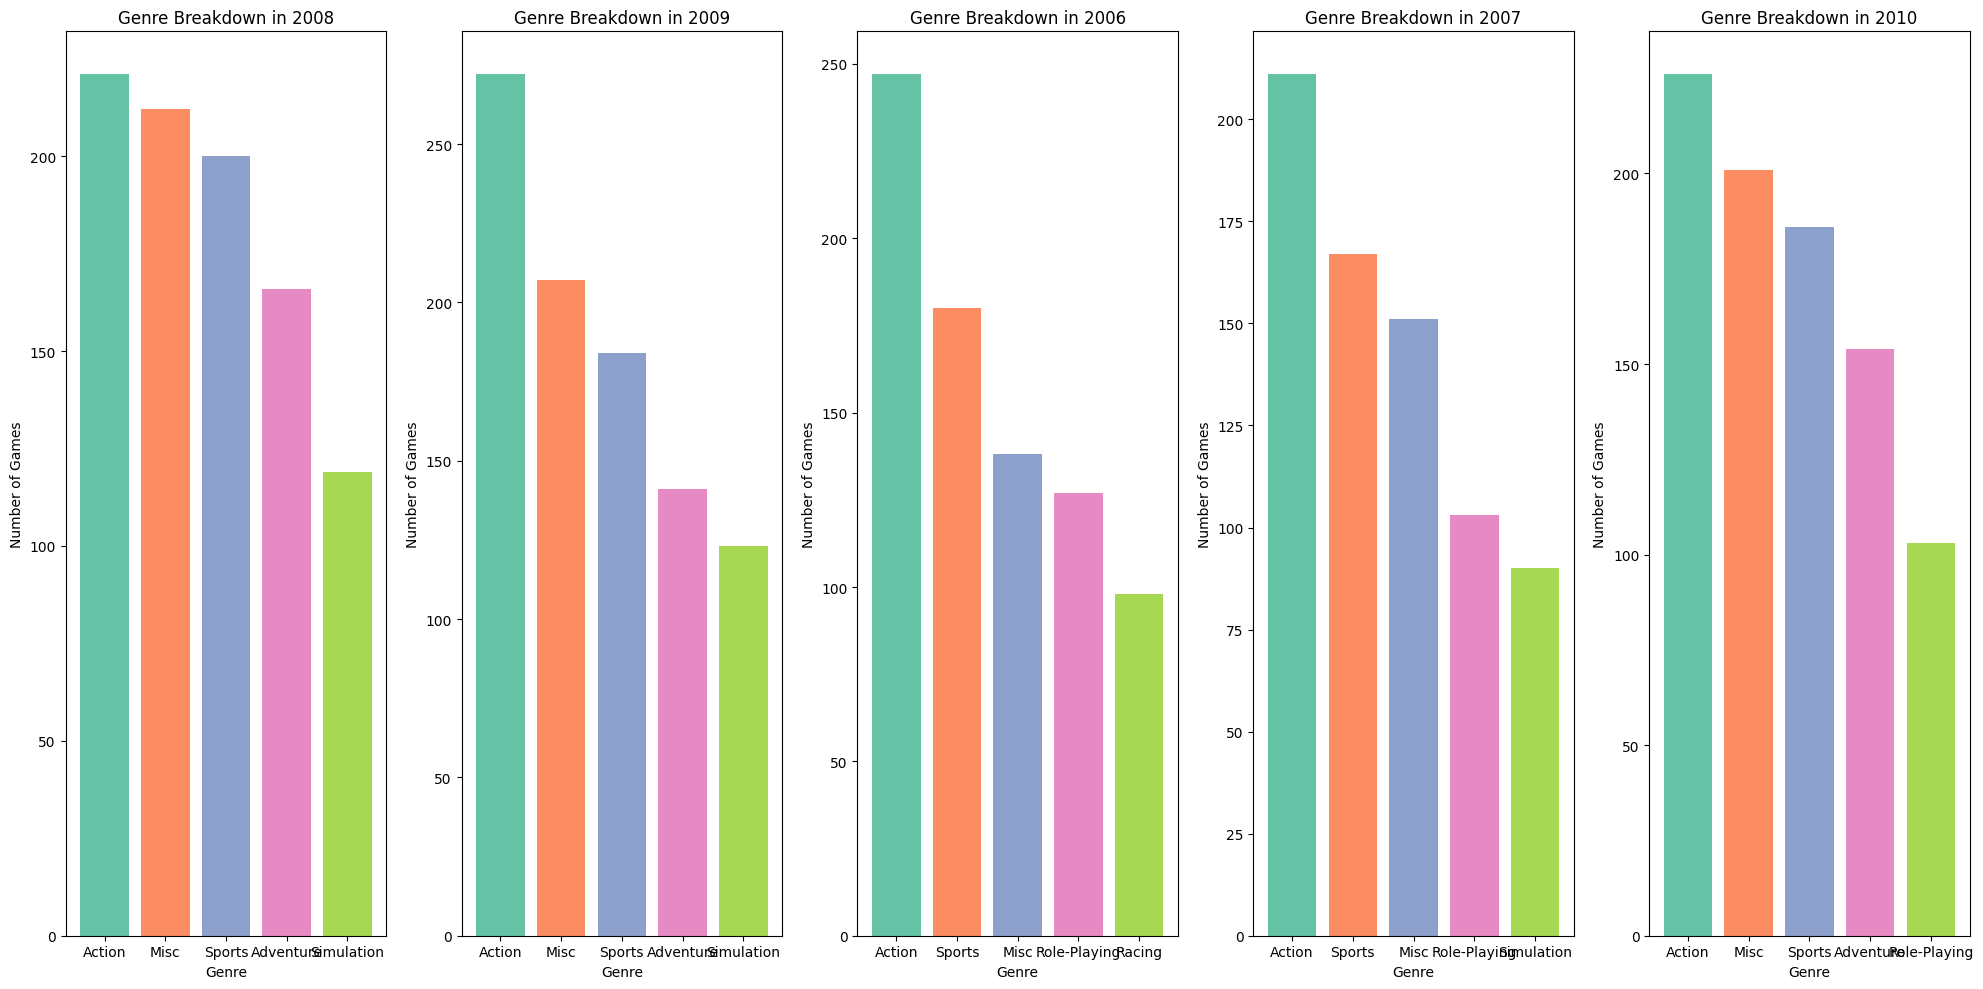

In [85]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10)) 
axes = axes.flatten()



for i, year in enumerate(top_5_years):
    genre_counts = df[df['Year'] == year]['Genre'].value_counts().head()
    
    axes[i].bar(genre_counts.index, genre_counts.values, color=sns.color_palette("Set2", len(genre_counts)))
    axes[i].set_title(f"Genre Breakdown in {year}")
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel('Number of Games')
plt.tight_layout()
plt.show()

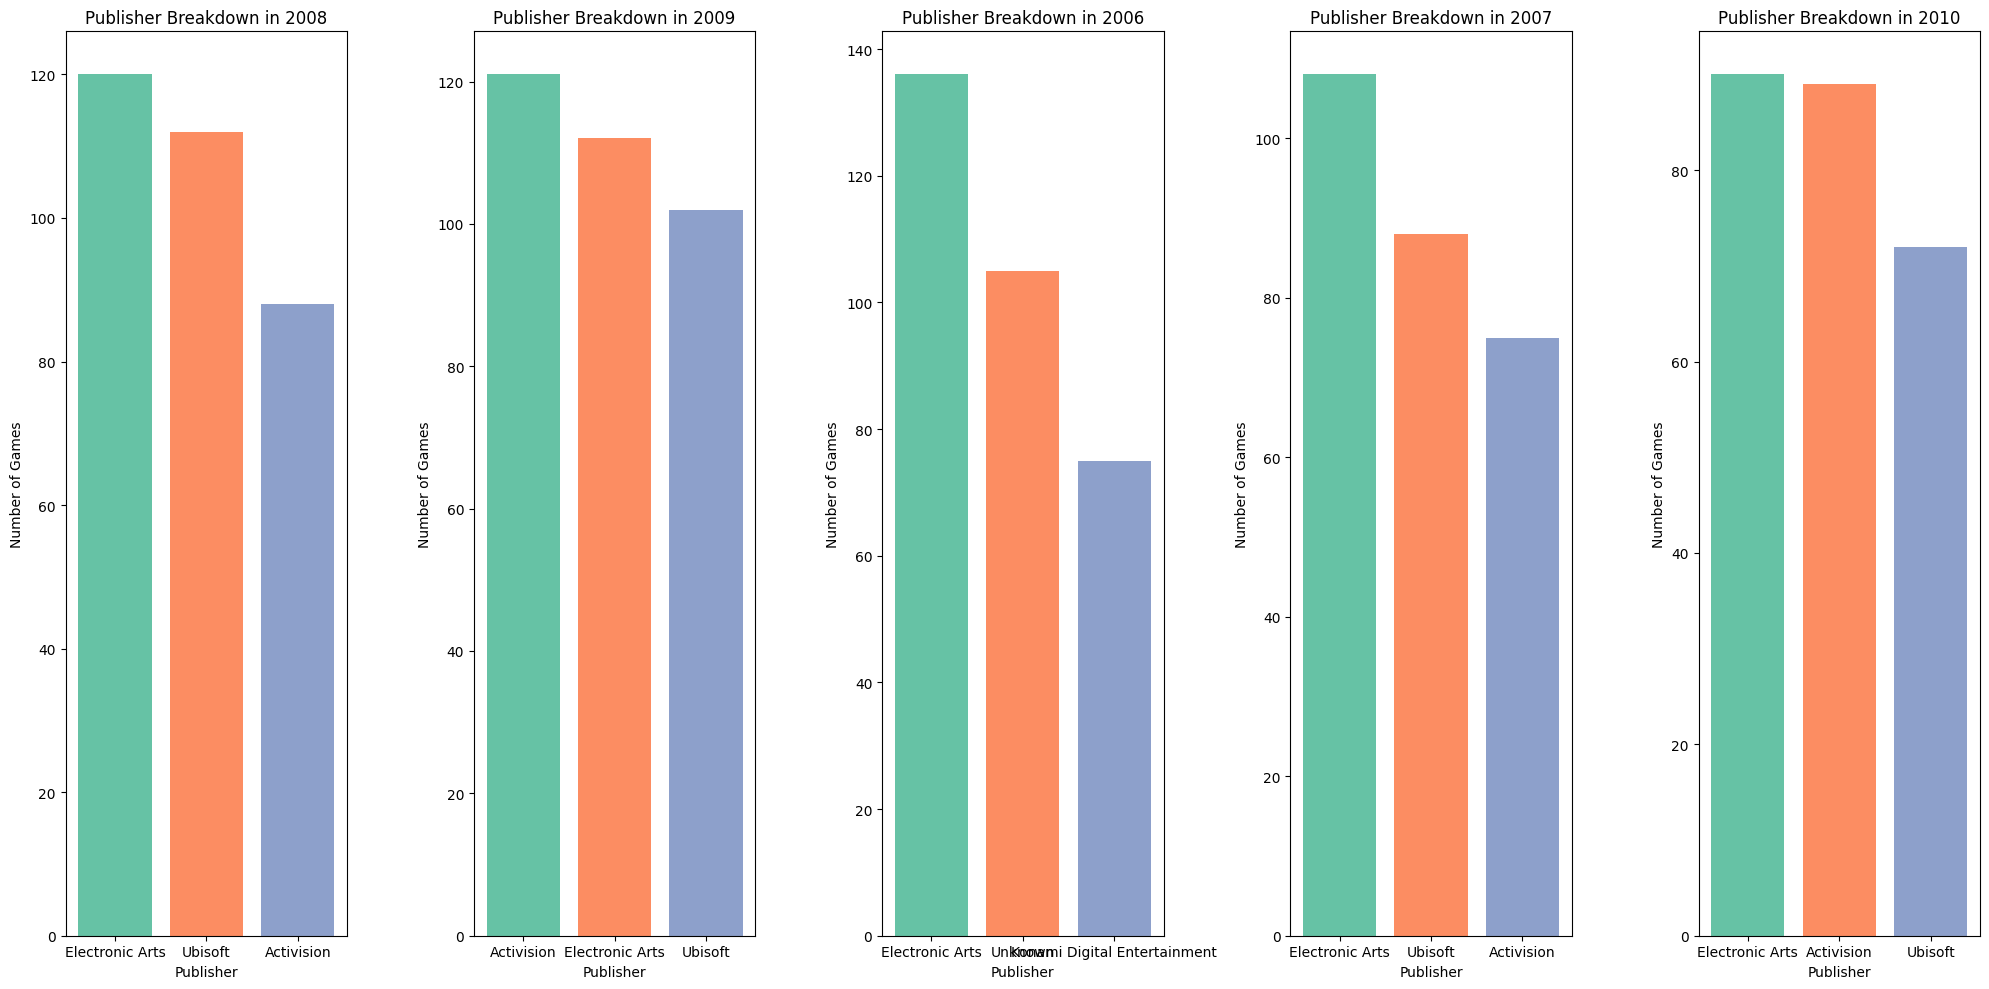

In [89]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10)) 
axes = axes.flatten()



for i, year in enumerate(top_5_years):
    publisher_counts = df[df['Year'] == year]['Publisher'].value_counts().head(3)
    
    axes[i].bar(publisher_counts.index, publisher_counts.values, color=sns.color_palette("Set2", len(publisher_counts)))
    axes[i].set_title(f"Publisher Breakdown in {year}")
    axes[i].set_xlabel('Publisher')
    axes[i].set_ylabel('Number of Games')
plt.tight_layout()
plt.show()

Electronic Arts,Ubisoft,Activision,Digital Entertainment were amongst the most game selling publishers

Now,Lets perform EDA on the games
---------------

In [95]:
df['Name'].unique()
df['Name'].value_counts()

Name
Need for Speed: Most Wanted      12
LEGO Marvel Super Heroes          9
Ratatouille                       9
Madden NFL 07                     9
FIFA 14                           9
                                 ..
Farming 2017 - The Simulation     1
Kinect Adventures!                1
Wii Fit Plus                      1
Wii Fit                           1
Nintendogs                        1
Name: count, Length: 11493, dtype: int64

Now,Lets see the top 10 most sold games

In [97]:
most_sold_games=df.sort_values(by='Global_Sales',ascending=False).head(10)
print(most_sold_games[['Name','Global_Sales']])

                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


Lets visualize it in the barplot

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\334142159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=most_sold_games, palette="viridis")


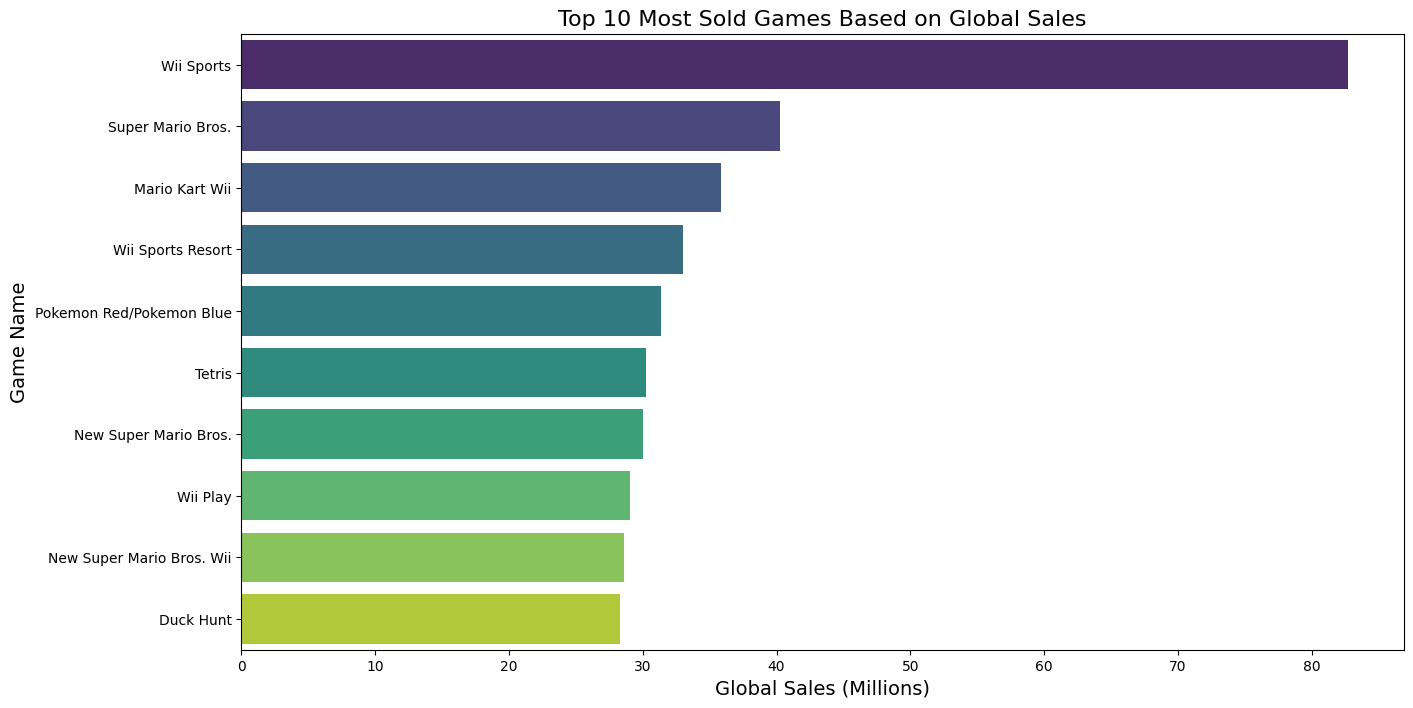

In [98]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Global_Sales', y='Name', data=most_sold_games, palette="viridis")
plt.xlabel('Global Sales (Millions)', fontsize=14)
plt.ylabel('Game Name', fontsize=14)
plt.title('Top 10 Most Sold Games Based on Global Sales', fontsize=16)
plt.show()

Let's see the breakdown of this games in different places

In [99]:
sales_breakdown_of_top_games=most_sold_games[['Name','NA_Sales','JP_Sales','EU_Sales','Other_Sales']]
print(sales_breakdown_of_top_games)

                        Name  NA_Sales  JP_Sales  EU_Sales  Other_Sales
0                 Wii Sports     41.49      3.77     29.02         8.46
1          Super Mario Bros.     29.08      6.81      3.58         0.77
2             Mario Kart Wii     15.85      3.79     12.88         3.31
3          Wii Sports Resort     15.75      3.28     11.01         2.96
4   Pokemon Red/Pokemon Blue     11.27     10.22      8.89         1.00
5                     Tetris     23.20      4.22      2.26         0.58
6      New Super Mario Bros.     11.38      6.50      9.23         2.90
7                   Wii Play     14.03      2.93      9.20         2.85
8  New Super Mario Bros. Wii     14.59      4.70      7.06         2.26
9                  Duck Hunt     26.93      0.28      0.63         0.47


Let's Visualize it

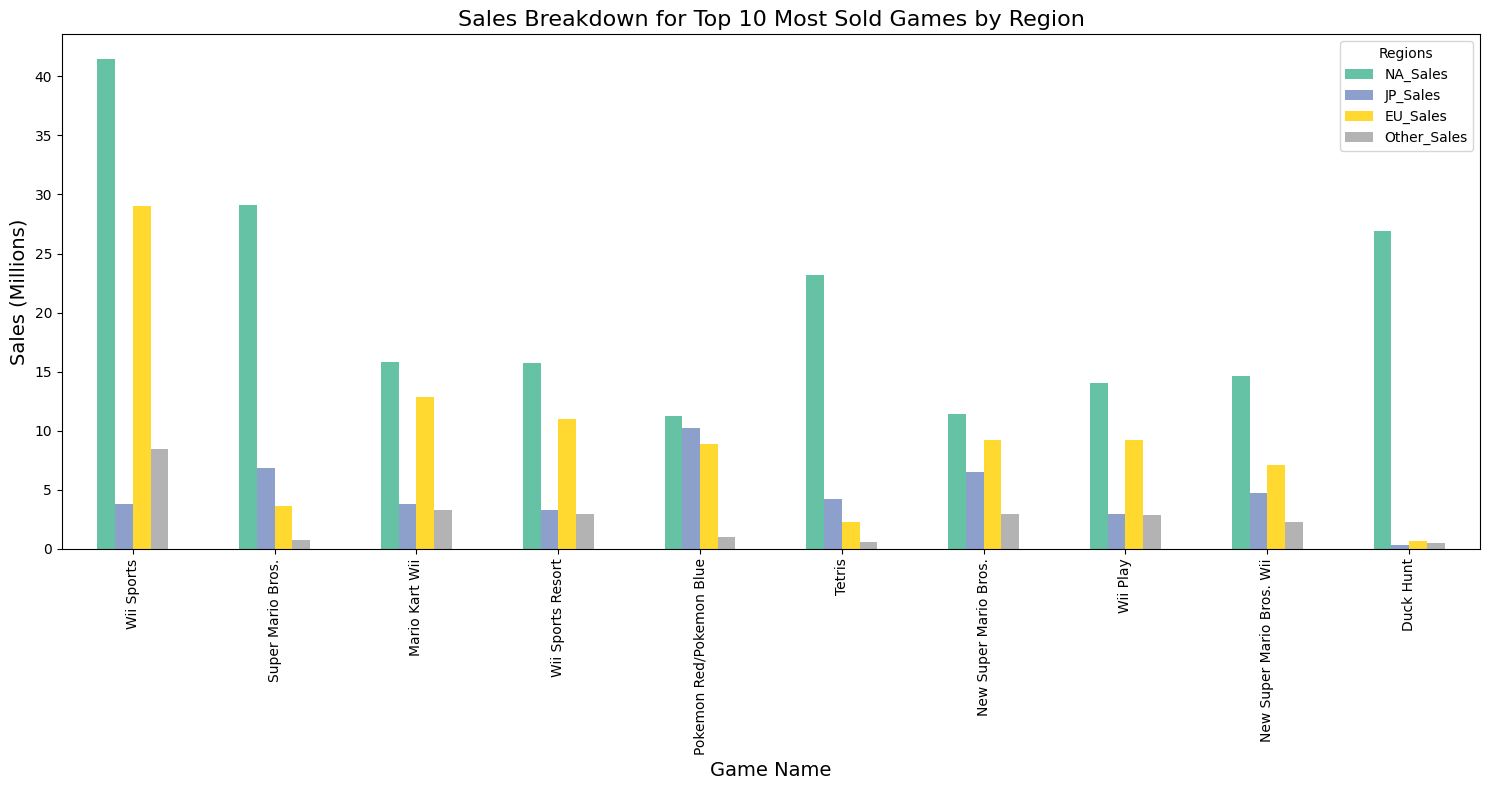

In [102]:
sales_breakdown_of_top_games.set_index('Name', inplace=True)

sales_breakdown_of_top_games.plot(kind='bar', figsize=(15, 8), colormap="Set2")
plt.xlabel('Game Name', fontsize=14)
plt.ylabel('Sales (Millions)', fontsize=14)
plt.title('Sales Breakdown for Top 10 Most Sold Games by Region', fontsize=16)
plt.xticks(rotation=90)
plt.legend(title='Regions')
plt.tight_layout()
plt.show()

Visualizing in pie chart

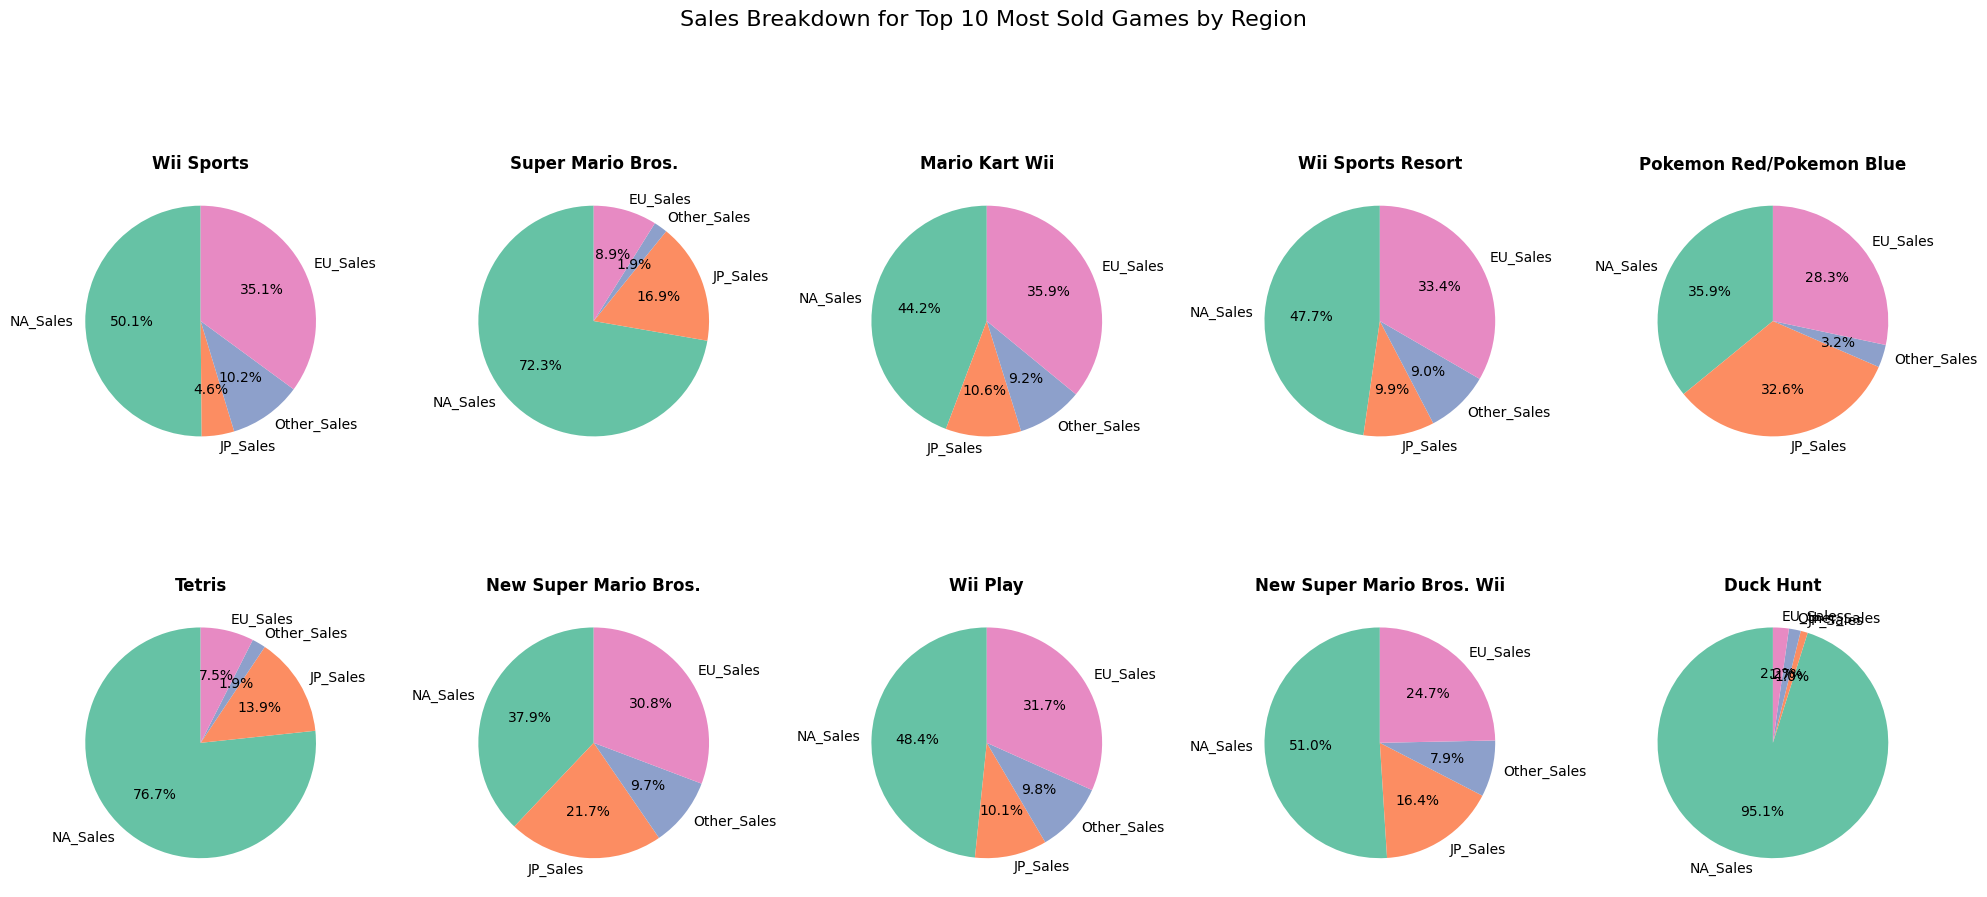

In [114]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  
axes = axes.flatten()

for i, (index, row) in enumerate(sales_breakdown_of_top_games.iterrows()):
    game_sales = row[['NA_Sales', 'JP_Sales', 'Other_Sales', 'EU_Sales']]
    
    axes[i].pie(game_sales, labels=game_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
    
    axes[i].set_title(index, fontsize=12, fontweight='bold') 

plt.tight_layout()
plt.suptitle('Sales Breakdown for Top 10 Most Sold Games by Region', fontsize=16)
plt.subplots_adjust(top=0.9)  
plt.show()


Let's see for the least sold games

In [116]:
least_sold_games=df.sort_values(by='Global_Sales',ascending=True).head(10)
print(least_sold_games[['Name','Global_Sales']])

                                       Name  Global_Sales
16584                      Bust-A-Move 3000          0.01
16583                        Carmageddon 64          0.01
16582                       Planet Monsters          0.01
16581                             Fit & Fun          0.01
16580                             Real Rode          0.01
16579                     PGA European Tour          0.01
16520  Tengai Makyo: Dai Yon no Mokushiroku          0.01
16519            Bakumatsu Rock: Ultra Soul          0.01
16518                      Crossroad Crisis          0.01
16517          Teenage Mutant Ninja Turtles          0.01


In [117]:
breakdown_of_least_sold_games=least_sold_games[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
print(breakdown_of_least_sold_games)

                                       Name  NA_Sales  EU_Sales  JP_Sales  \
16584                      Bust-A-Move 3000      0.01      0.00      0.00   
16583                        Carmageddon 64      0.01      0.00      0.00   
16582                       Planet Monsters      0.01      0.00      0.00   
16581                             Fit & Fun      0.00      0.01      0.00   
16580                             Real Rode      0.00      0.00      0.01   
16579                     PGA European Tour      0.01      0.00      0.00   
16520  Tengai Makyo: Dai Yon no Mokushiroku      0.00      0.00      0.01   
16519            Bakumatsu Rock: Ultra Soul      0.00      0.00      0.01   
16518                      Crossroad Crisis      0.01      0.00      0.00   
16517          Teenage Mutant Ninja Turtles      0.00      0.01      0.00   

       Other_Sales  
16584          0.0  
16583          0.0  
16582          0.0  
16581          0.0  
16580          0.0  
16579          0.0  
16520

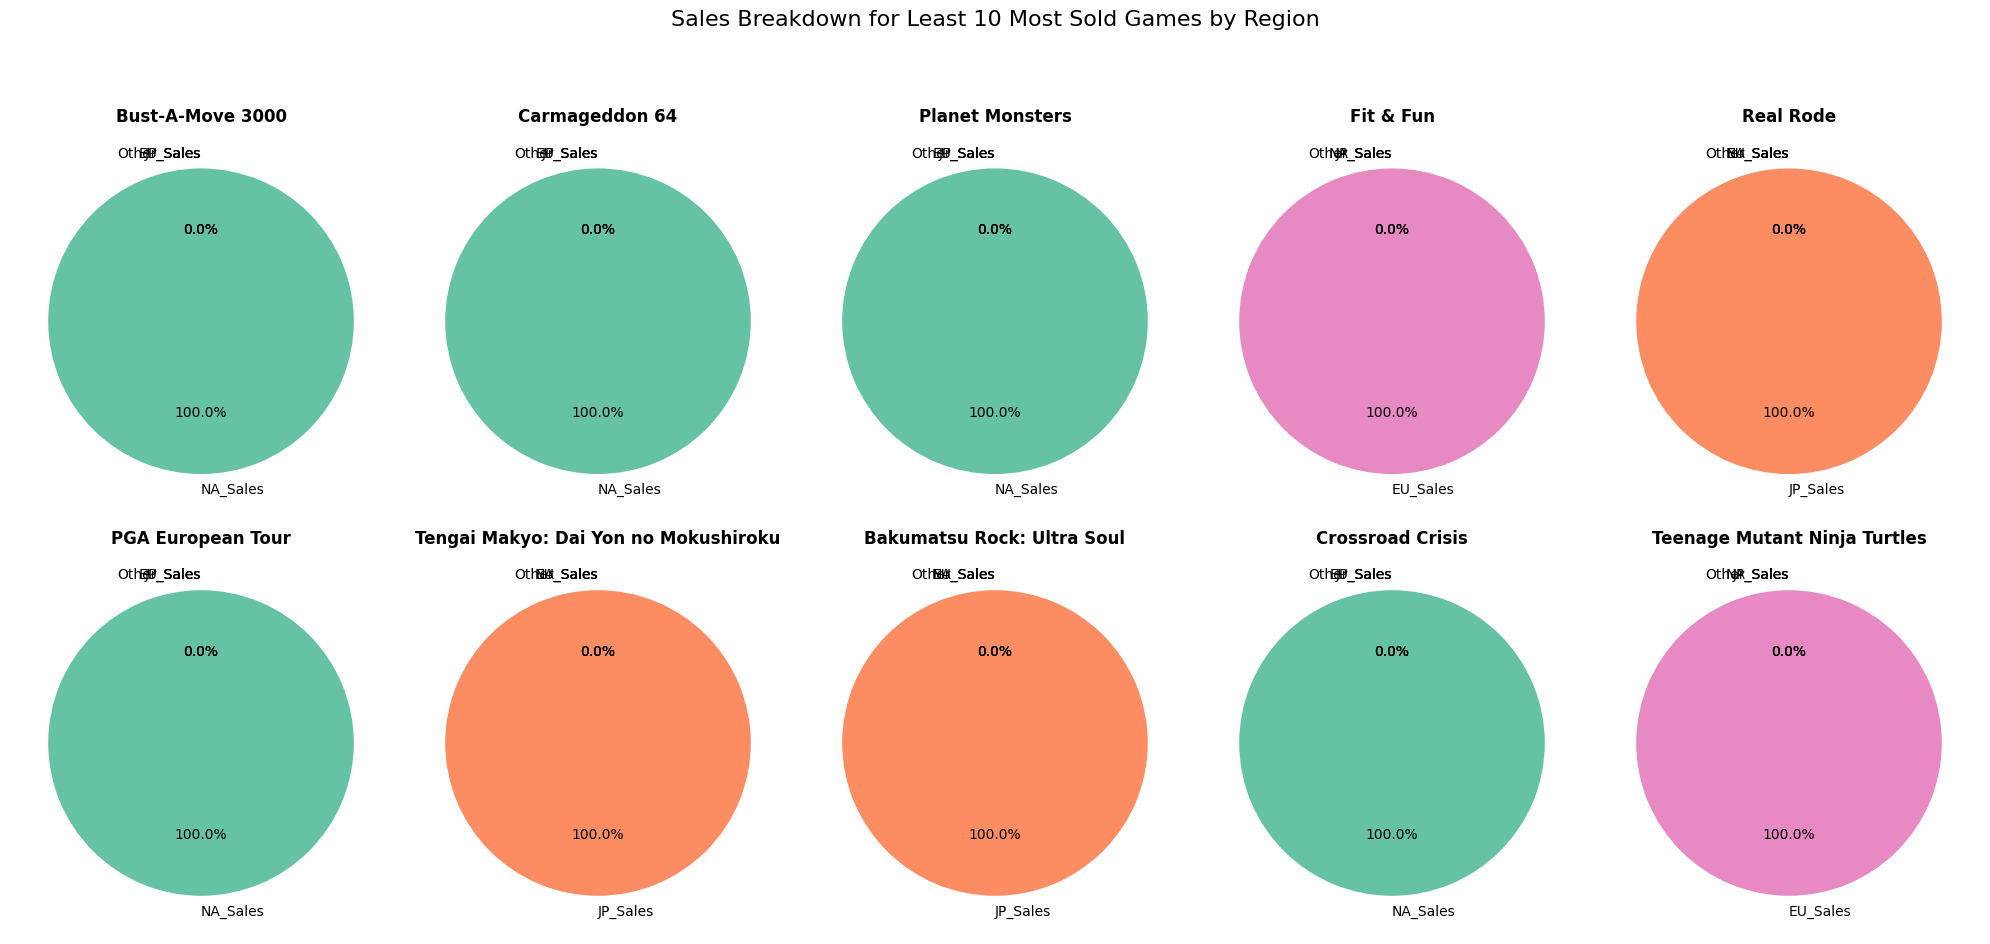

In [121]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  
axes = axes.flatten()

for i, (index, row) in enumerate(breakdown_of_least_sold_games.iterrows()):
    game_sales = row[['NA_Sales', 'JP_Sales', 'Other_Sales', 'EU_Sales']]
    
    axes[i].pie(game_sales, labels=game_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
    
    axes[i].set_title(row['Name'], fontsize=12, fontweight='bold') 

plt.tight_layout()
plt.suptitle('Sales Breakdown for Least 10 Most Sold Games by Region', fontsize=16)
plt.subplots_adjust(top=0.9)  
plt.show()


Let's observe the top 20 publishers with highest published games

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\1708095599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


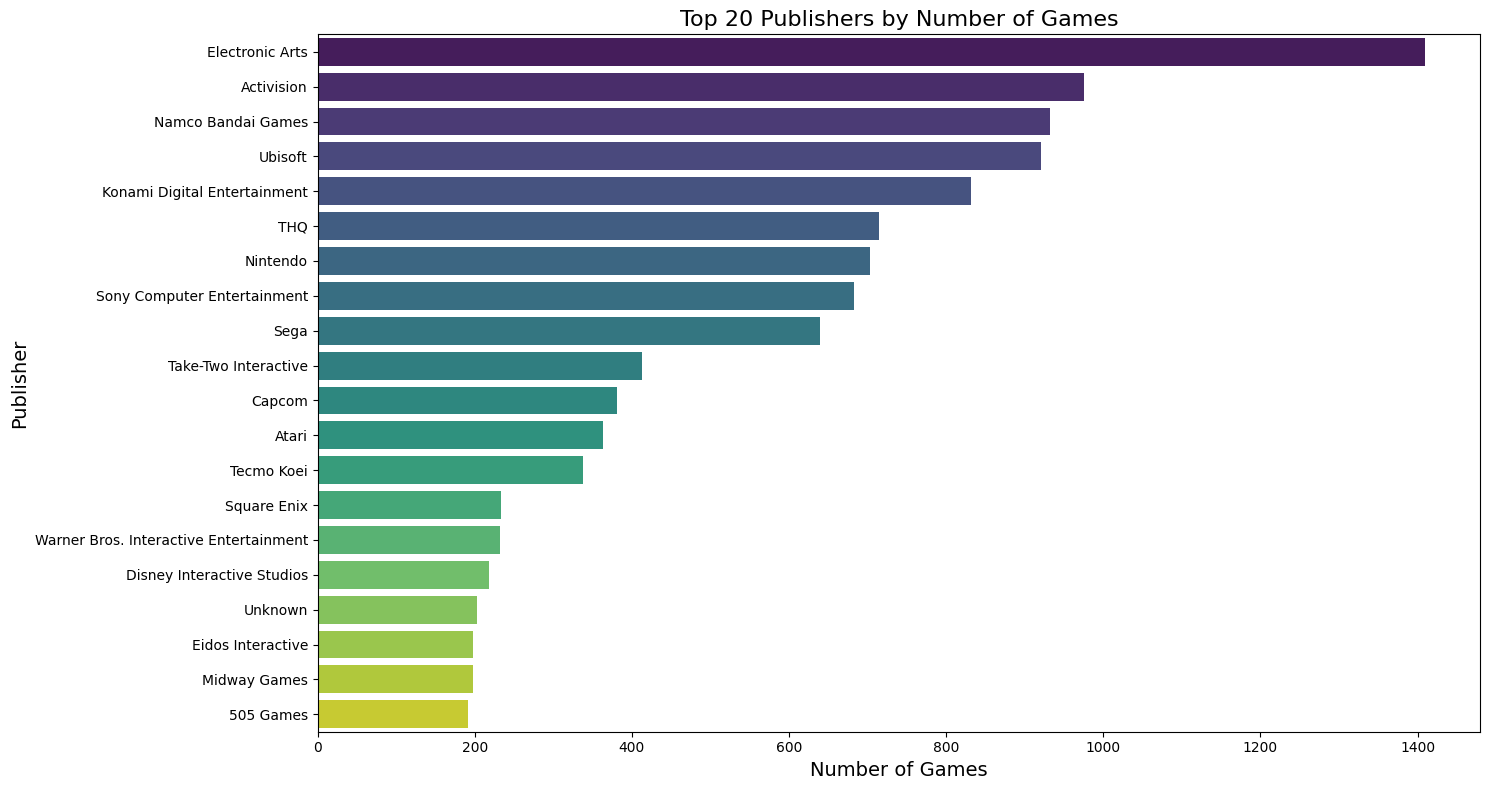

In [123]:
publisher_game_count = df['Publisher'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(
    y=publisher_game_count.head(20).index, 
    x=publisher_game_count.head(20).values, 
    palette="viridis"
)
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.title('Top 20 Publishers by Number of Games', fontsize=16)
plt.tight_layout()
plt.show()


Let's observe the total sales generated by each publisher

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_11292\772186008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


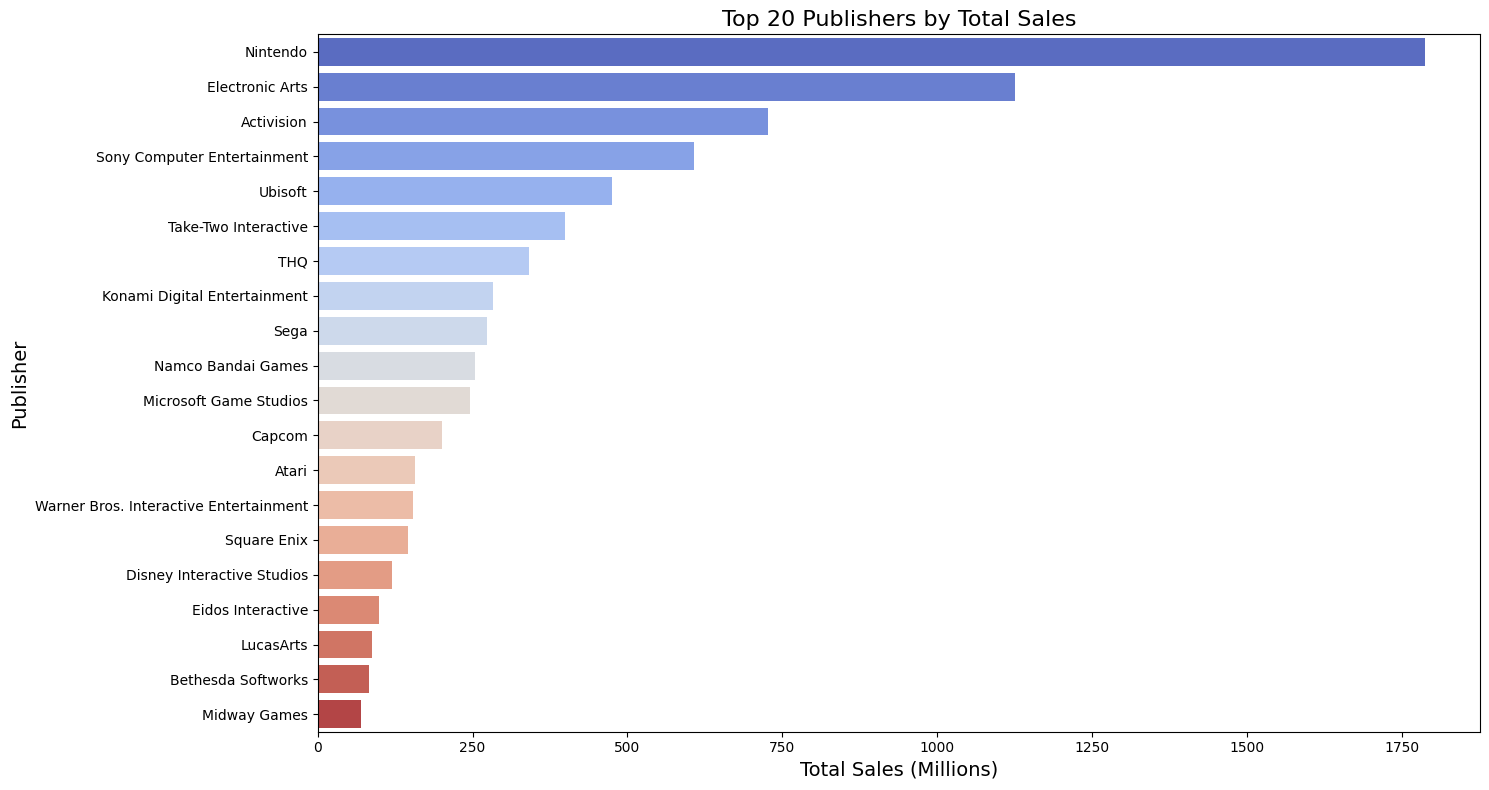

In [125]:
publisher_total_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(
    y=publisher_total_sales.head(20).index, 
    x=publisher_total_sales.head(20).values, 
    palette="coolwarm"
)
plt.xlabel('Total Sales (Millions)', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.title('Top 20 Publishers by Total Sales', fontsize=16)
plt.tight_layout()
plt.show()


Let's see the total distribution across different regions

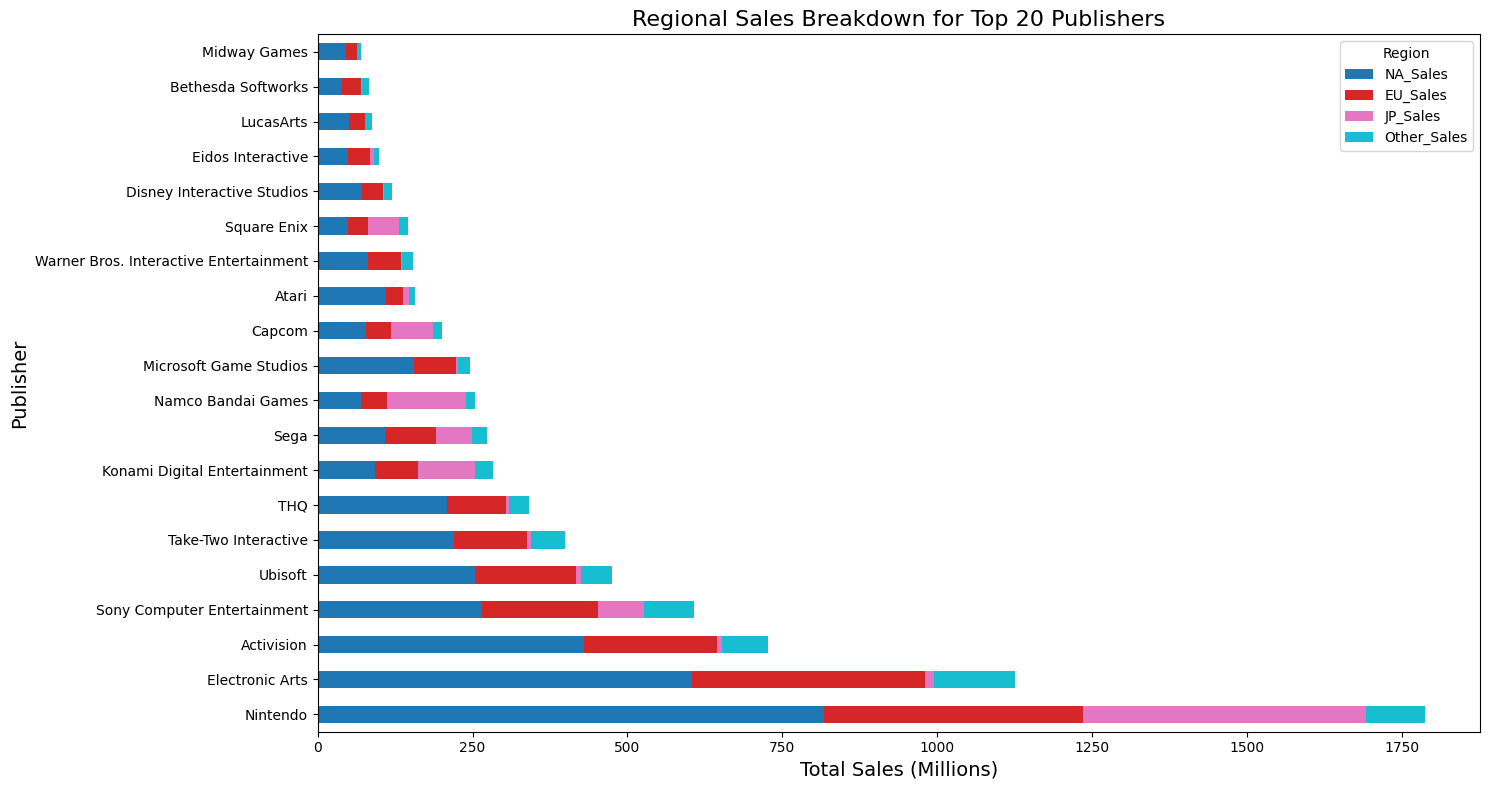

In [126]:
regional_sales_by_publisher = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

top_20_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20).index
regional_sales_top_20 = regional_sales_by_publisher.loc[top_20_publishers]

regional_sales_top_20.plot(
    kind='barh', 
    stacked=True, 
    figsize=(15, 8), 
    colormap="tab10"
)

plt.xlabel('Total Sales (Millions)', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.title('Regional Sales Breakdown for Top 20 Publishers', fontsize=16)
plt.legend(title='Region', fontsize=10)
plt.tight_layout()
plt.show()


Let's visualize in pie-chart

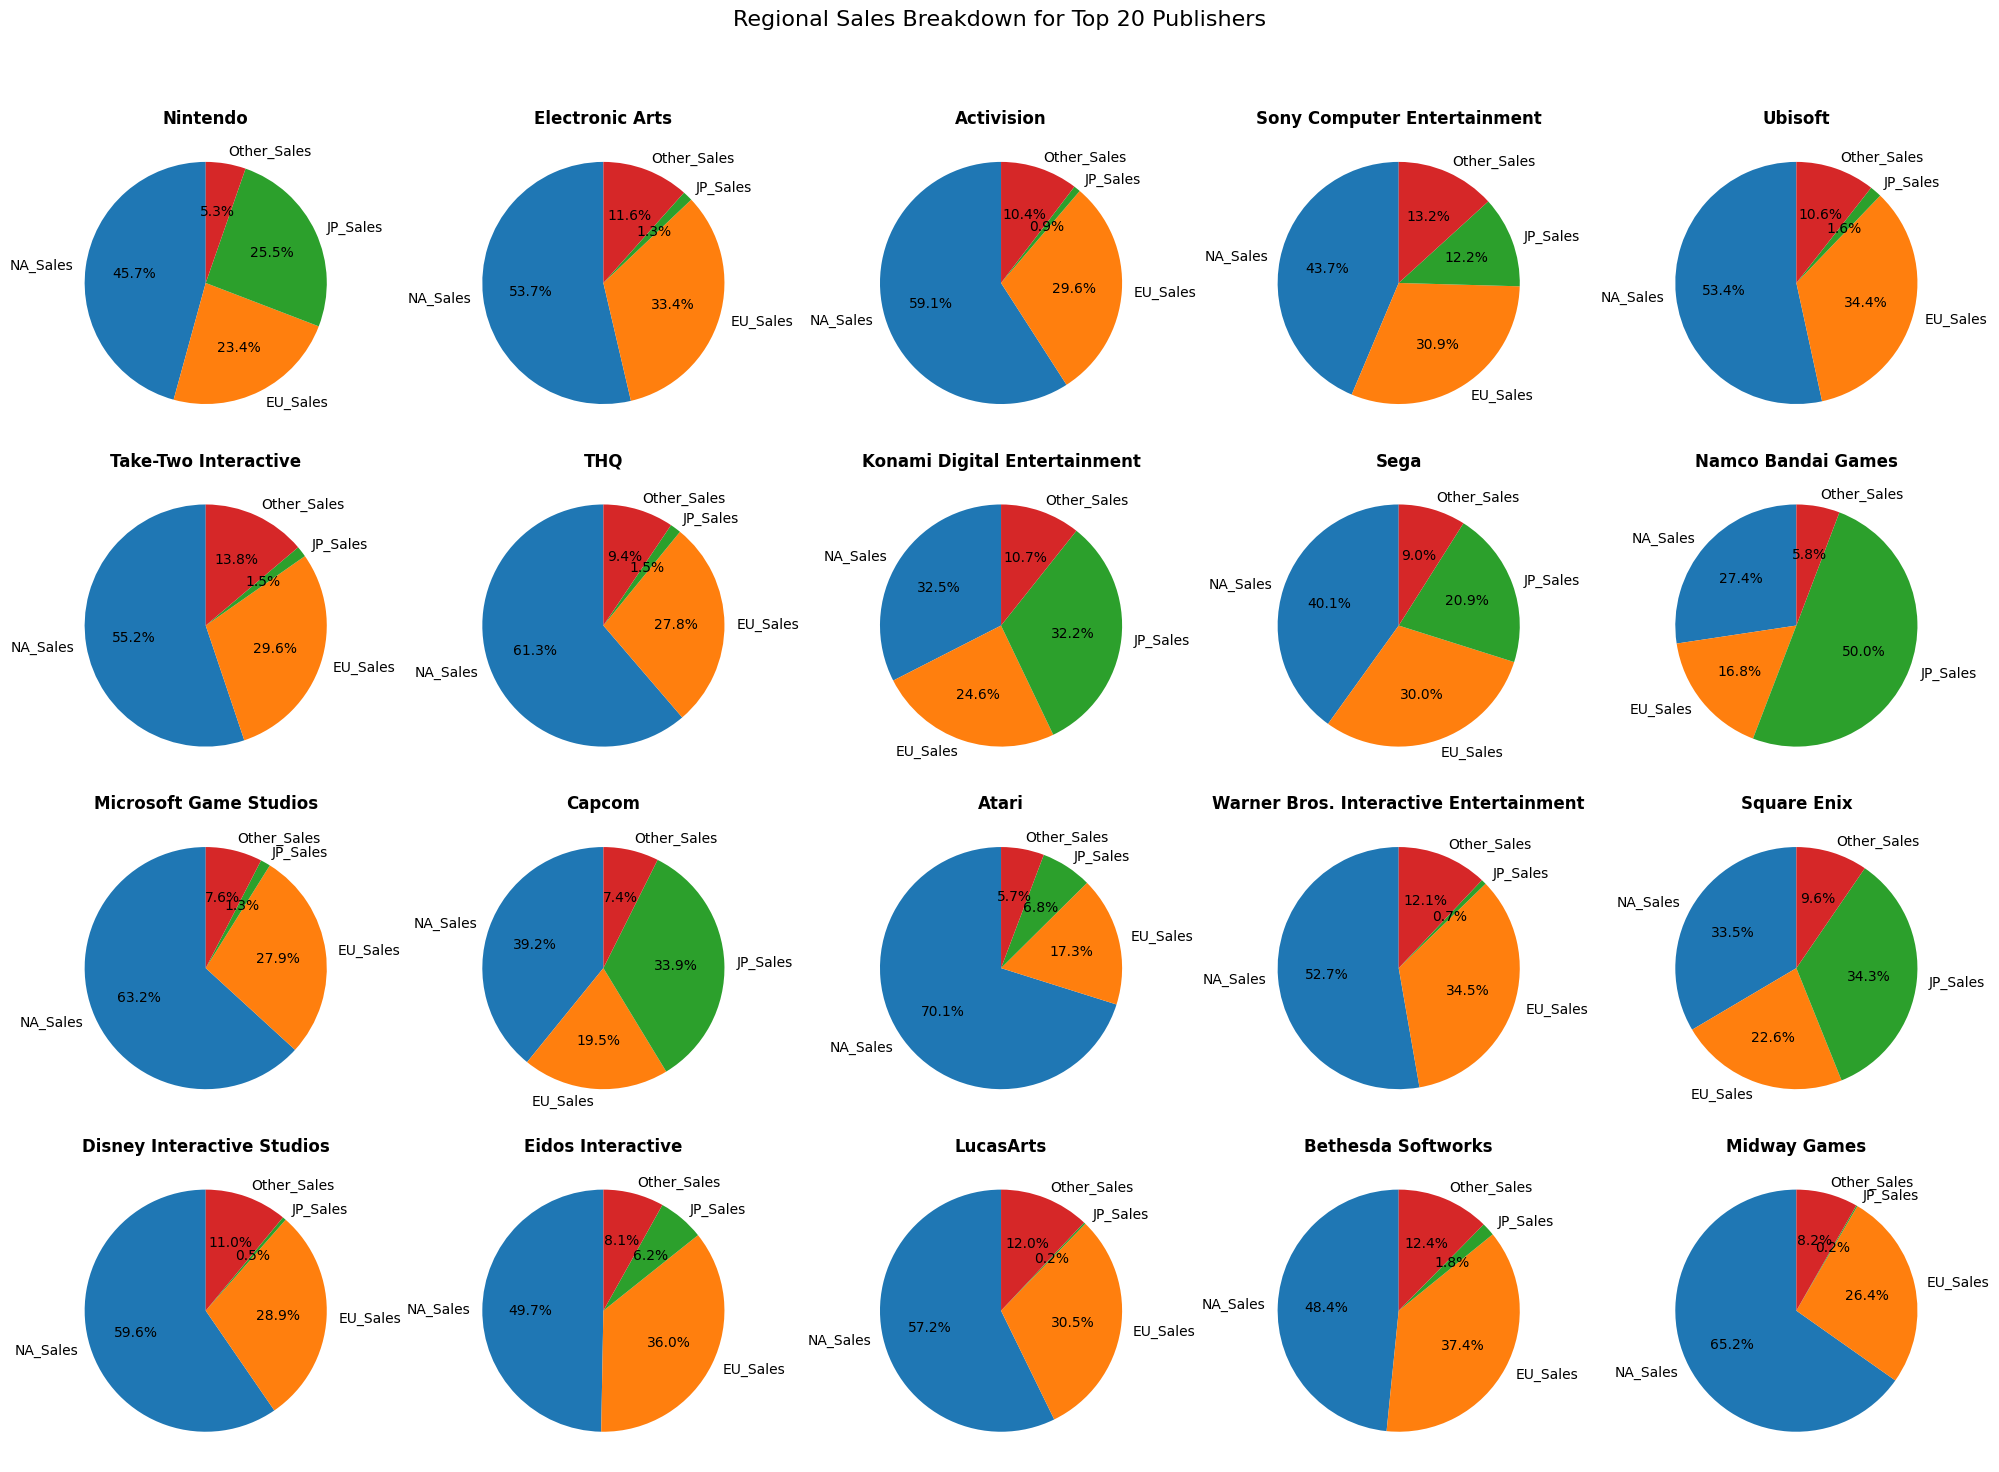

In [128]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15))  
axes = axes.flatten()

for i, publisher in enumerate(top_20_publishers):
    sales = regional_sales_by_publisher.loc[publisher]

    axes[i].pie(
        sales, 
        labels=sales.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("tab10", len(sales))
    )
    axes[i].set_title(publisher, fontsize=12, fontweight='bold')

plt.suptitle('Regional Sales Breakdown for Top 20 Publishers', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9) 
plt.show()


Time series plot for total sales by publishers over the years

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])

sales_over_years = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()

top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5).index
filtered_sales = sales_over_years[sales_over_years['Publisher'].isin(top_publishers)]

fig = px.line(
    filtered_sales,
    x='Year',
    y='Global_Sales',
    color='Publisher',
    title='Total Sales of Top Publishers Over the Years',
    labels={
        'Year': 'Year',
        'Global_Sales': 'Total Sales (Millions)',
        'Publisher': 'Publisher'
    },
    markers=True
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Sales (Millions)',
    title_font_size=18,
    legend_title_font_size=12,
    legend_title_text='Publisher',
    template='plotly_white'
)
pio.show(fig)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed